In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split, ShuffleSplit, cross_validate, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor



## Bài 1

In [10]:
data = pd.read_csv('housing.csv')
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


<Axes: xlabel='median_house_value', ylabel='Count'>

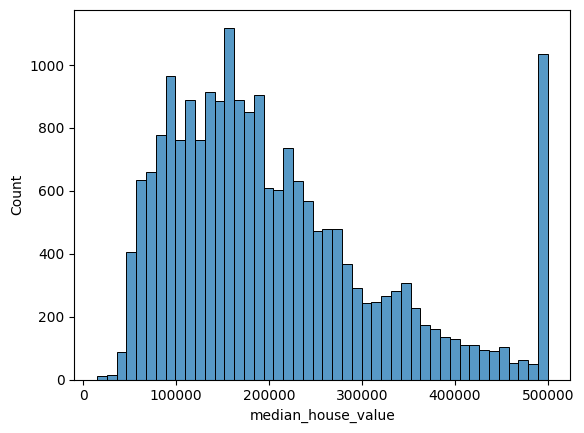

In [11]:
sns.histplot(data['median_house_value'])

In [12]:
print('Số dòng của dữ liệu:', data.shape[0])
print('Số cột của dữ liệu:', data.shape[1])
print(data.columns) # In ra tên các cột

Số dòng của dữ liệu: 20640
Số cột của dữ liệu: 10
Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')


In [13]:
data.isnull().sum() # Kiểm tra xem có dòng nào bị thiếu dữ liệu không

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

<Axes: >

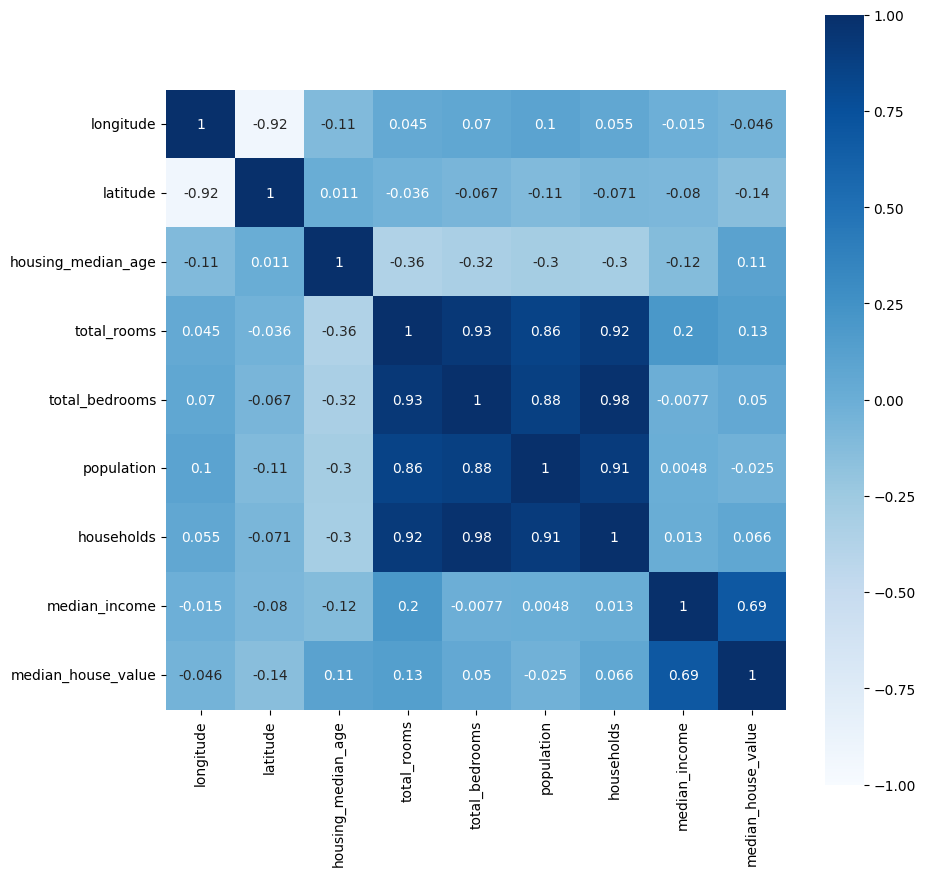

In [14]:
correlation = data.drop(columns='ocean_proximity').corr(method='pearson')   # Tạo ra ma trận tương quan

fig = plt.subplots(figsize=(10, 10))
sns.heatmap(correlation, annot=True, cmap='Blues', square=True, vmax=1, vmin=-1)

<Axes: xlabel='median_income', ylabel='median_house_value'>

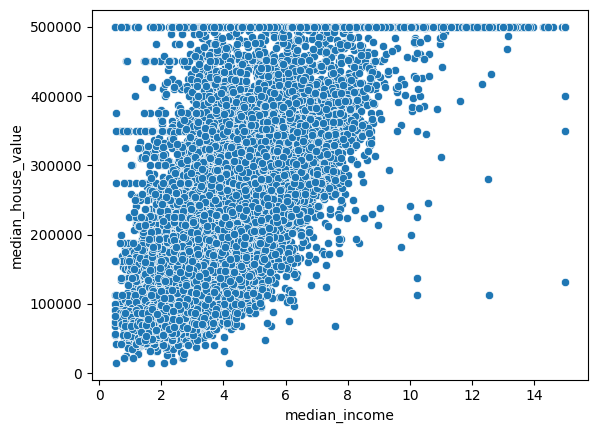

In [15]:
# Ve bieu do tan xa du lieu huan luyen
sns.scatterplot(data=data, x="median_income", y="median_house_value")


In [16]:
X = data['median_income']
y = data['median_house_value']
# X = X.values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = X_train.values.reshape(-1, 1)
X_test = X_test.values.reshape(-1, 1)
print('Chiều của tập huấn luyện:', X_train.shape)
print('Chiều của tập kiểm tra:', X_test.shape)

Chiều của tập huấn luyện: (16512, 1)
Chiều của tập kiểm tra: (4128, 1)


In [17]:
sc = MinMaxScaler(feature_range=(1, 55))

y_train_transformed = sc.fit_transform(y_train.values.reshape(-1,1)).reshape(-1)
y_test_transformed = sc.fit_transform(y_test.values.reshape(-1,1)).reshape(-1)
y_transformed = sc.fit_transform(y.values.reshape(-1,1)).reshape(-1)

In [18]:
model = LinearRegression()
model.fit(X_train, y_train_transformed)
y_pred = model.predict(X_test)

In [19]:
mean_squared_error(y_test_transformed, y_pred, squared = True)

87.90581581394004

<Axes: xlabel='median_income', ylabel='median_house_value'>

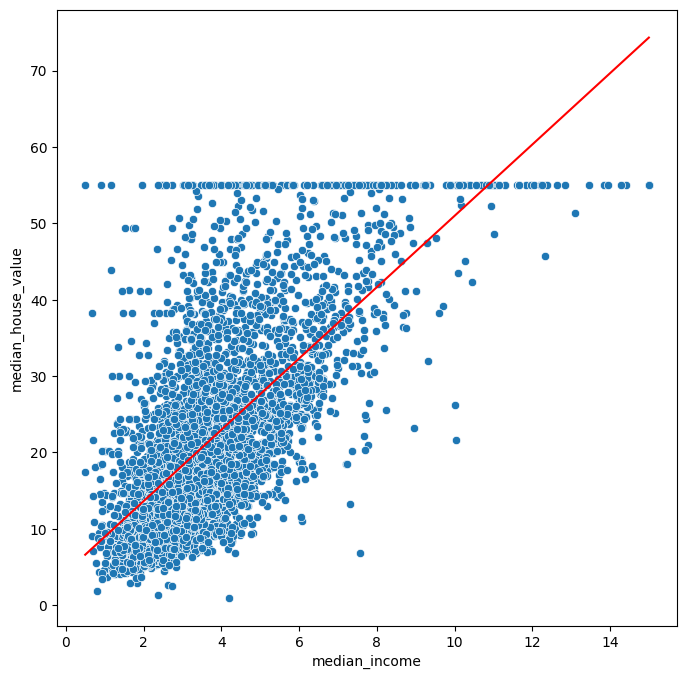

In [20]:
test_true = pd.DataFrame({'median_income': X_test.reshape(-1), 'median_house_value': y_test_transformed})
test_pred = pd.DataFrame({'median_income': X_test.reshape(-1), 'median_house_value': y_pred})

fig= plt.figure(figsize=(8,8))

sns.lineplot(data=test_pred, x="median_income", y="median_house_value", color='red')
sns.scatterplot(data=test_true, x="median_income", y="median_house_value")


In [21]:
kf = ShuffleSplit(n_splits=10, test_size=0.2, random_state=42)

avg_mse = []
for train_index, test_index in kf.split(X, y_transformed):
    X_train = X.values[train_index].reshape(-1,1)
    y_train = y_transformed[train_index]

    X_test = X.values[test_index].reshape(-1,1)
    y_test = y_transformed[test_index]

    model = LinearRegression()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    result = mean_squared_error(y_test, y_pred, squared=True)

    # Lưu lại kết quả từng fold vào avg_mse
    avg_mse.append(result)

np.mean(np.array(avg_mse))

87.48644533666005

Thực hiện cross validate khi scale về đoạn [0,1] để dề dàng so sánh với Bài 2

In [22]:
sc = MinMaxScaler()
X = sc.fit_transform(data['median_income'].values.reshape(-1,1)).reshape(-1,1)
y_transformed = sc.fit_transform(data['median_house_value'].values.reshape(-1,1)).reshape(-1)

In [23]:
kf = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)

avg_mse = []
for train_index, test_index in kf.split(X, y_transformed):
    X_train = X[train_index]
    y_train = y_transformed[train_index]

    X_test = X[test_index]
    y_test = y_transformed[test_index]

    model = LinearRegression()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    result = mean_squared_error(y_test, y_pred, squared=True)

    # Lưu lại kết quả từng fold vào avg_mse
    avg_mse.append(result)

np.mean(np.array(avg_mse))

0.030137276138599456

## Bài 2

<Axes: xlabel='total_bedrooms', ylabel='median_house_value'>

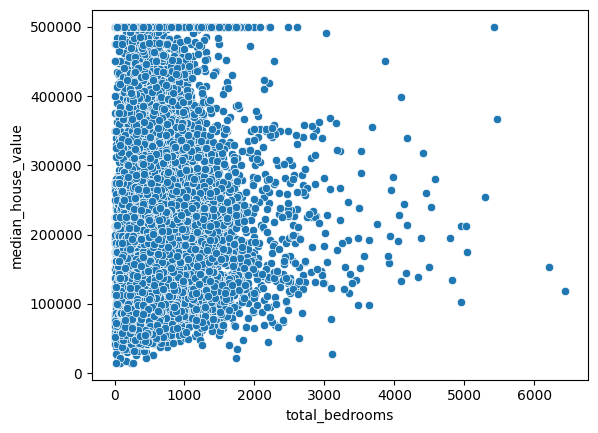

In [24]:
# Ve bieu do tan xa du lieu huan luyen
sns.scatterplot(data=data, x="total_bedrooms", y="median_house_value")

In [25]:
X = data['total_bedrooms'].values.reshape(-1,1)
y = data['median_house_value'].values

In [26]:
imp = SimpleImputer(missing_values=np.nan, strategy='median')
X_processed = imp.fit_transform(X)

In [27]:
sc = MinMaxScaler()
X_processed = sc.fit_transform(X_processed)
y = sc.fit_transform(y.reshape(-1,1)).reshape(-1)

In [28]:
kf = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)

avg_mse = []

for train_index, test_index in kf.split(X_processed, y):
    X_train = X_processed[train_index]
    y_train = y[train_index]

    X_test = X_processed[test_index]
    y_test = y[test_index]

    model = LinearRegression()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    result = mean_squared_error(y_test, y_pred, squared=True)

    # Lưu lại kết quả từng fold vào avg_mse
    avg_mse.append(result)

np.mean(np.array(avg_mse))

0.0562844775971713

Nhận xét: kết quả khi dự đoán giá trị `median house value` bằng thuộc tính `median income` ở bài 1 cho kết quả có độ lỗi MSE thấp hơn so với khi dự đoán bằng thuộc tính `total bedrooms` ở bài 2. Nguyên nhân là vì trên correlation matrix ta nhận thấy `median income` có tương quan tuyến tính so với biến mục tiêu cao hơn `total bedrooms`.

## Bài 3

In [29]:
X1 = data['total_bedrooms'].values.reshape(-1,1)
X2 = data['median_income'].values.reshape(-1,1)
y = data['median_house_value'].values

In [30]:
imp = SimpleImputer(missing_values=np.nan, strategy='median')
X1 = imp.fit_transform(X1)

In [31]:
X = np.concatenate((X1, X2), axis=1)

sc = MinMaxScaler()
X = sc.fit_transform(X)
y = sc.fit_transform(y.reshape(-1,1)).reshape(-1)

In [32]:
kf = ShuffleSplit(n_splits=10, test_size=0.2, random_state=42)

avg_mse = []

for train_index, test_index in kf.split(X, y):
    X_train = X[train_index]
    y_train = y[train_index]

    X_test = X[test_index]
    y_test = y[test_index]

    model = LinearRegression()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    result = mean_squared_error(y_test, y_pred, squared=True)

    # Lưu lại kết quả từng fold vào avg_mse
    avg_mse.append(result)

np.mean(np.array(avg_mse))

0.029830581463435386

Nhận xét: độ lỗi MSE ở bài 3 có giảm hơn một chút so với bài 1 và thấp hơn nhiều so với bài 2. Bời vì việc kết hợp 2 thuộc tính sẽ giúp mô hình tăng khả năng biểu diễn. Tuy nhiên độ lỗi giảm không nhiều so với bài 1 do trong 2 thuộc tính thì thuộc tính `median income` có ý nghĩa dự đoán cao hơn nhiều so với thuộc tính `total bedrooms`.

## Bài 4

Train Linear Regression trên toàn bộ thuộc tính trừ `ocean_proximity` vì đây không phải thuộc tính dạng số

In [33]:
data = pd.read_csv('housing.csv')
X = data.drop(columns=['median_house_value', 'ocean_proximity']).values
y = data['median_house_value'].values

In [34]:
imp = SimpleImputer(missing_values=np.nan, strategy='median')
X = imp.fit_transform(X)

sc = MinMaxScaler()
X = sc.fit_transform(X)
y = sc.fit_transform(y.reshape(-1,1)).reshape(-1)

In [35]:
kf = ShuffleSplit(n_splits=10, test_size=0.2, random_state=42)

avg_mse = []

for train_index, test_index in kf.split(X, y):
    X_train = X[train_index]
    y_train = y[train_index]

    X_test = X[test_index]
    y_test = y[test_index]

    model = LinearRegression()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    result = mean_squared_error(y_test, y_pred, squared=True)

    # Lưu lại kết quả từng fold vào avg_mse
    avg_mse.append(result)

np.mean(np.array(avg_mse))

0.020967133546651133

Ridge regression

In [36]:
kf = ShuffleSplit(n_splits=10, test_size=0.2, random_state=42)

avg_mse = []

for train_index, test_index in kf.split(X, y):
    X_train = X[train_index]
    y_train = y[train_index]

    X_test = X[test_index]
    y_test = y[test_index]

    model = Ridge()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    result = mean_squared_error(y_test, y_pred, squared=True)

    # Lưu lại kết quả từng fold vào avg_mse
    avg_mse.append(result)

np.mean(np.array(avg_mse))

0.021005302610677352

Nhận xét: `ridge regression` thường là một lựa chọn tốt hơn so với `linear regression` khi cần giảm overfitting và xử lý các vấn đề khác như đa cộng tuyến trong mô hình hồi quy tuyến tính. Tuy nhiên trong trường hợp này độ lỗi lại tăng khi sử dụng `ridge regression` thay cho `linear regression` bởi vì khi các biến đầu vào không có mức độ tương quan quá cao với nhau thì việc sử dụng ridge regression có thể không hiệu quả. Nó có thể làm giảm khả năng biểu diễn của mô hình.

## Bài 5

In [37]:
data = pd.read_csv('housing.csv')
X = data.drop(columns=['median_house_value', 'ocean_proximity']).values
y = data['median_house_value'].values

In [38]:
imp = SimpleImputer(missing_values=np.nan, strategy='median')
X = imp.fit_transform(X)

sc = MinMaxScaler()
X = sc.fit_transform(X)
y = sc.fit_transform(y.reshape(-1,1)).reshape(-1)

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
model = RandomForestRegressor()

param_grid = {
    'n_estimators': [50, 200],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [2, 4]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)

grid_search.fit(X_train, y_train)

print(grid_search.best_params_)



{'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}


In [45]:
best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)

print(mean_squared_error(y_test, y_pred, squared=True))

test_true = pd.DataFrame({'median_house_value': y_test})
test_pred = pd.DataFrame({'median_house_value': y_pred})

0.010476137248748964


Ta nhận thấy sử dụng mô hình `Random Forest` sau khi đã được tune với bộ siêu tham số được chọn bằng phương pháp `grid search` thì độ lỗi đã giảm mạnh cho ra chỉ bằng một nửa khi so với mô hình `linear regression`

## Bài 6

In [46]:
data = pd.read_csv('insurance.csv')
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [47]:
X = data.drop(columns=['charges'])
y = data['charges']
print(X)
print(y)

      age     sex     bmi  children smoker     region
0      19  female  27.900         0    yes  southwest
1      18    male  33.770         1     no  southeast
2      28    male  33.000         3     no  southeast
3      33    male  22.705         0     no  northwest
4      32    male  28.880         0     no  northwest
...   ...     ...     ...       ...    ...        ...
1333   50    male  30.970         3     no  northwest
1334   18  female  31.920         0     no  northeast
1335   18  female  36.850         0     no  southeast
1336   21  female  25.800         0     no  southwest
1337   61  female  29.070         0    yes  northwest

[1338 rows x 6 columns]
0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


Sử dụng chiến lược `OneHotEncoder` để biến dữ liệu dạng phân loại thành dữ liệu dạng số

In [48]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline

# Xác định các cột số và phân loại
numeric_features = ['age','bmi','children']
categorical_features = ['sex','smoker','region']

# Pipeline cho xử lý các cột
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numeric_features),  # Chuẩn hóa các cột số
        ('cat', OneHotEncoder(), categorical_features)  # Mã hóa one-hot cho các cột phân loại
    ])

# Tạo pipeline cho toàn bộ quá trình xử lý dữ liệu
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

# Fit và transform dữ liệu
X = pipeline.fit_transform(X)

# In ra dữ liệu đã được xử lý
print(X)
print(y)

[[19.   27.9   0.   ...  0.    0.    1.  ]
 [18.   33.77  1.   ...  0.    1.    0.  ]
 [28.   33.    3.   ...  0.    1.    0.  ]
 ...
 [18.   36.85  0.   ...  0.    1.    0.  ]
 [21.   25.8   0.   ...  0.    0.    1.  ]
 [61.   29.07  0.   ...  1.    0.    0.  ]]
0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y.values, test_size=0.2, random_state=42)

Tiến hành train mô hình `LinearRegression` trên bộ dữ liệu đã tiền xử lý và thử dự đoán một mẫu dữ liệu trong bộ test

In [50]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test[0].reshape(1,-1))
print('y_true: ', y_test[0])
print('y_pred: ', y_pred[0])

y_true:  9095.06825
y_pred:  8969.550274436171


Ta nhận thấy mô hình dự đoán số tiền khá gần với thực tế